In [1]:
#Using yfinance library to read stocks
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import pandas_datareader
import scipy.stats as st
import matplotlib.dates as mdates
import seaborn as sns
import os

In [2]:
#Create list of stock tickers
symbols = ['FDX', 'UPS', 'TGT','GM','TM','LUV','DAL','TWTR','FB','WMT']
#stockfinal= pd.read_csv("outputData/stocks.csv")
stockfinal=pd.DataFrame()
stock=[]
# I've converted the function to use variables for the dates
# This way you can comment/uncomment the time period you want to graph
# and everything will change in the titles and file names
#Entire time period
# start = datetime.datetime(2019,1,1)
#end = datetime.datetime(2020,12,31)

#2019 only
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2019,12,31)

# 2020 only
# start = datetime.datetime(2020,1,1)
# end = datetime.datetime(2020,12,31)

# Pre-covid 2020
# start = datetime.datetime(2020,1,1)
# end = datetime.datetime(2020,3,1)

# Post-covid 2020
# start = datetime.datetime(2020,3,1)
# end = datetime.datetime(2020,12,31)

# This converts the datetime info into string format for use in titles and 
# file names.
startString = start.strftime("%d %B %Y")
endString = end.strftime("%d %B %Y")
#startString2 = start.strftime("%Y-%m-%1")

# The program crashes if the directory already exists (as I found out in testing)
# so I added a try statement.  If the directory doesn't exist, it makes one
# if it exists, it moves on
# the directory name is start date - end date for that series of graphs
try:
    os.mkdir(f'{startString} - {endString}')
except:
    pass
#Read stocks in symols list, add to data frame
# This is the first place we use the start/end variables to define the download period
for ticker in symbols:
    stock=yf.download(ticker, start=start, end=end)
    if len(stock)!=0:
        stock["Name"]=ticker
        stockfinal=stockfinal.append(stock, sort=False)
#write data frame to csv file in a directory that is named for the time period
stockfinal.to_csv(f'{startString} - {endString}/Stocks from {startString} to {endString}.csv', encoding = 'utf-8')
#startString2

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
#create new data frame grouped by ticker name and calculate common describe() statistics elements
stock_group=stockfinal.groupby("Name")
stock_describe=stock_group["Close"].describe()
stock_describe

,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
DAL,251.0,55.291434,3.884984,45.610001,52.139999,56.139999,58.014999,63.160000
FB,251.0,181.543426,16.014201,131.740005,171.995003,184.509995,193.014999,208.100006
FDX,251.0,166.707809,13.432067,138.389999,157.095001,164.429993,177.040001,198.149994
GM,251.0,37.566813,1.690770,32.250000,36.345001,37.669998,38.860001,40.880001
LUV,251.0,53.089402,2.697740,45.610001,51.160000,52.880001,54.725000,58.290001
TGT,251.0,91.712629,18.403969,65.529999,76.575001,86.160004,107.969997,129.210007
TM,251.0,128.472032,8.214705,114.650002,121.895000,126.480003,135.864998,145.059998
TWTR,251.0,35.589522,4.510967,27.990000,31.224999,35.020000,39.655001,45.419998
UPS,251.0,110.752032,8.160776,92.919998,102.885002,112.910004,117.494999,124.300003


In [4]:
#Find min and max of each ticker
mins=stock_group["Close"].min()
maxs=stock_group["Close"].max()
#create data frame to keep rows of min and max for each ticker
mins_data=pd.DataFrame()
maxs_data=pd.DataFrame()
#Reset data frme index since the initial index is on date but in order to find correct date of ticker, date column should be as regular column
stockfinal=stockfinal.reset_index()
for ticker in symbols:
    mins_data=mins_data.append(stockfinal[(stockfinal["Name"]==ticker) & (stockfinal["Close"]==mins[ticker])])
    maxs_data=maxs_data.append(stockfinal[(stockfinal["Name"]==ticker) & (stockfinal["Close"]==maxs[ticker])])
#Show info for mins of each ticker
mins_data

,Date,Open,High,Low,Close,Adj Close,Volume,Name
193,2019-10-08,140.800003,140.940002,138.380005,138.389999,135.768219,2382600,FDX
354,2019-05-31,94.379997,95.000000,92.650002,92.919998,88.480698,4192400,UPS
503,2019-01-03,66.129997,66.629997,65.410004,65.529999,62.248390,4562200,TGT
754,2019-01-03,33.340000,33.680000,32.200001,32.250000,30.575533,11618300,GM
1005,2019-01-03,115.849998,116.279999,114.290001,114.650002,111.154800,309500,TM
1256,2019-01-03,46.480000,46.570000,44.610001,45.610001,44.823132,4404900,LUV
1507,2019-01-03,48.509998,48.939999,45.080002,45.610001,44.099281,18694100,DAL
1758,2019-01-03,28.379999,29.180000,27.940001,27.990000,27.990000,19051700,TWTR
2009,2019-01-03,134.690002,137.169998,131.119995,131.740005,131.740005,22717900,FB
2260,2019-01-03,93.209999,94.709999,92.699997,92.860001,89.522263,8277300,WMT


In [5]:
#Show info for maxs of each ticker
maxs_data

,Date,Open,High,Low,Close,Adj Close,Volume,Name
74,2019-04-18,198.470001,199.320007,197.820007,198.149994,192.880463,1391700,FDX
467,2019-11-08,123.519997,125.309998,123.510002,124.300003,119.367599,2310700,UPS
751,2019-12-27,129.000000,129.229996,128.229996,129.210007,126.649338,2233600,TGT
893,2019-07-24,40.590000,40.910000,40.330002,40.880001,39.561546,7318200,GM
1221,2019-11-11,144.949997,145.410004,144.350006,145.059998,142.523254,210200,TM
1277,2019-02-04,57.200001,58.310001,57.150002,58.290001,57.284374,4426900,LUV
1640,2019-07-16,61.880001,63.259998,61.720001,63.160000,61.866245,10319700,DAL
1646,2019-07-24,62.389999,63.439999,62.380001,63.160000,62.263969,5718800,DAL
1928,2019-09-06,45.220001,45.680000,44.560001,45.419998,45.419998,13108500,TWTR
2257,2019-12-27,208.669998,208.929993,206.589996,208.100006,208.100006,10284200,FB


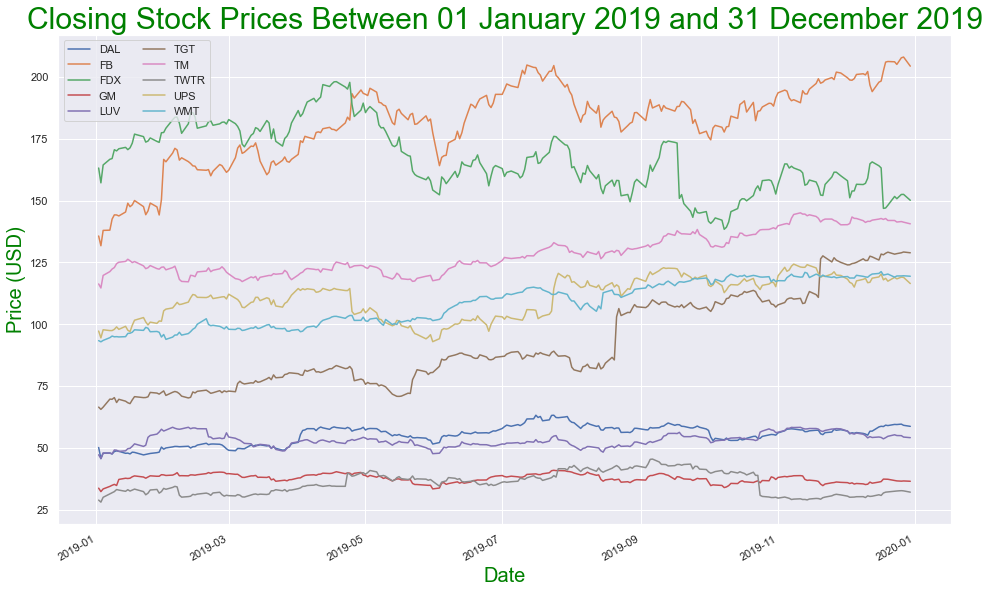

In [6]:
#Create a comparable plot for all tickers in data frame 
sns.set()
allTick = plt.figure(figsize=(16, 10))
stock_group["Close"].plot()
if (startString == '01 January 2019' and endString == '31 December 2020') or \
(startString == '01 January 2020' and endString == '31 December 2020') or \
(startString == '01 January 2020' and endString == '01 March 2020'):
    plt.axvline(x='2020-3-1',color='r',linestyle='--')
    plt.axvline(x='2020-1-1',color='b',linestyle='--')
plt.ylabel('Price (USD)', fontsize =20, color = 'green')
plt.xlabel('Date', fontsize =20, color = 'green')
plt.legend(ncol=2)
plt.title(f'Closing Stock Prices Between {startString} and {endString}',fontsize=30, color="green") 
title =(f'Closing Stock Prices Between {startString} and {endString}')
plt.show()
# saves directory to dd-Month-YYYY - dd-Month-YYYY/closing stock prices between dd Month YYYY and dd Month YYYY.csv
allTick.savefig(f'{startString} - {endString}/{title}.png')

In [7]:
#create function to claculate linear regression, draw plot, draw linear regression for each couple of tickers
def linear_reg(x,y,dfName, dfName1):
    sns.set()
    ticker_df = stockfinal[stockfinal["Name"] == str(dfName)]
    ticker_df1 = stockfinal[stockfinal["Name"] == str(dfName1)]
    date_num = ticker_df[x].map(datetime.datetime.toordinal)
    slope, intercept, r_value, p_value, std_err = st.linregress(date_num,ticker_df[y])
    slope1, intercept1, r_value1, p_value1, std_err1 = st.linregress(date_num,ticker_df1[y])
    regression_value = date_num * slope + intercept
    regression_value1 = date_num * slope1 + intercept1
    twoTick = plt.figure(figsize=(20, 10))
    plt.plot(ticker_df[x], ticker_df[y])
    plt.plot(ticker_df1[x], ticker_df1[y])
    plt.plot(ticker_df[x], regression_value, color = 'red')
    plt.plot(ticker_df1[x], regression_value1, color = 'purple')
    eq = f"{(dfName)} y = {round(slope, 2)}x + {round(intercept, 2)}"
    eq1 = f"{(dfName1)} y = {round(slope1, 2)}x + {round(intercept1, 2)}"

#   I replaced hard coded dates with variables. This allows rapid changing of the data set
#   and also ensures the proper data file names and graph titles
#   ab=(mdates.date2num(dt.datetime(2019,3,1)), (ticker_df[y].mean()))
#   ab1=(mdates.date2num(dt.datetime(2019,3,1)), (ticker_df1[y].mean()))
    ab = (mdates.date2num(start), (ticker_df[y].mean()))
    ab1 =(mdates.date2num(start), (ticker_df1[y].mean()))
    # Define the linear regression equation colors and size
    plt.annotate(eq,ab, color='red', fontsize = 16)
    plt.annotate(eq1,ab1, color='purple', fontsize = 16)
    # Define graph labels, size and color
    plt.xlabel(x, fontsize = 20, color = 'green')
    plt.ylabel(y, fontsize = 20, color = 'green')
    # Plot the legend
    plt.legend([dfName, dfName1])
    
    # Set the title of the graph, also used in the file name  Format is 
    # 
    t = f"Plot for {dfName} and {dfName1} between {startString} and {endString}"
    plt.title(t, fontsize = 30, color = 'green')
    plt.show()
    print(f"For {dfName} the r-value is: {r_value} and p-value is: {p_value}")
    print(f"For {dfName1} the r-value is: {r_value1} and p-value is: {p_value1}")

    #   Define the file name using start/end dates + title.png 
    twoTick.savefig(f'{startString} - {endString}/{t}.png')

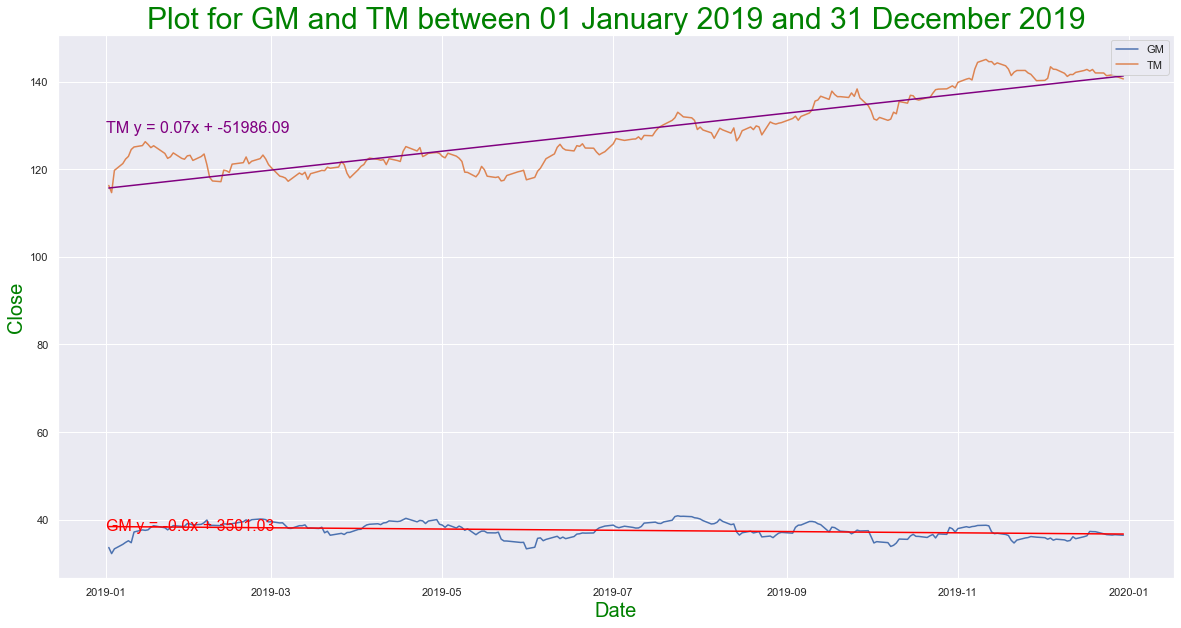

For GM the r-value is: -0.2903514783098634 and p-value is: 2.8934198500901954e-06
For TM the r-value is: 0.8992173578266368 and p-value is: 2.2552888507571824e-91


In [8]:
#Linear regression for GM and TM
linear_reg("Date", "Close", "GM", "TM")

# the regression equation rarely ends up in an optimal spot
# because we're using a function to plot these graphs.

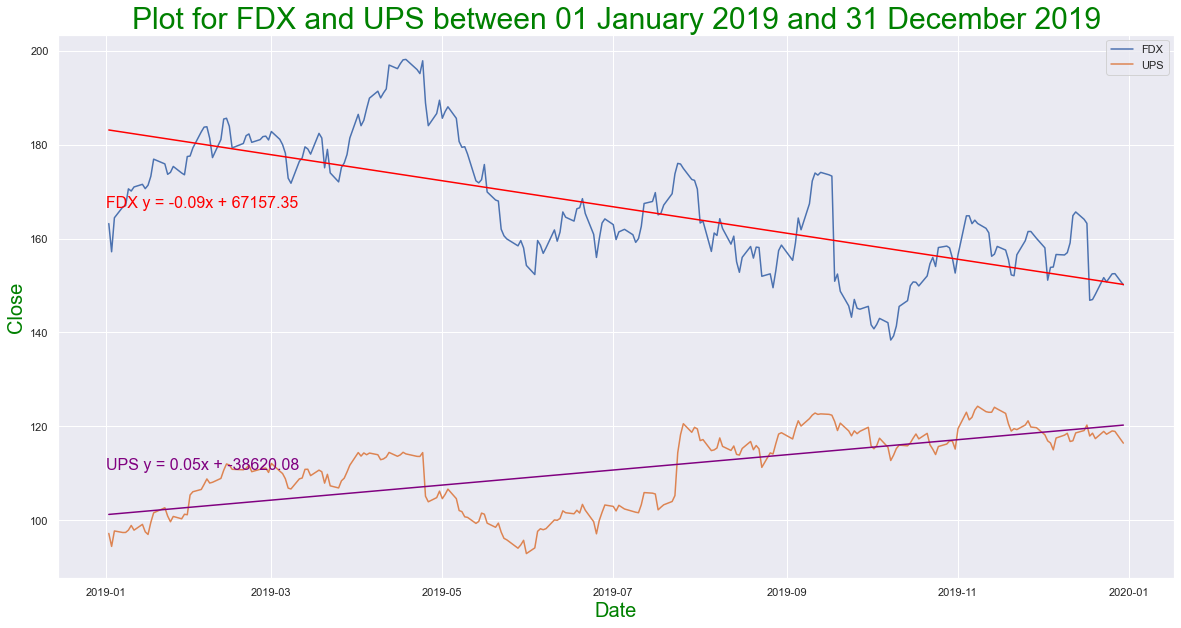

For FDX the r-value is: -0.7069176958671151 and p-value is: 2.5292475303074923e-39
For UPS the r-value is: 0.6727023577261692 and p-value is: 1.9930812712912573e-34


In [9]:
#Linear regression for FDX and UPS
linear_reg("Date", "Close", "FDX", "UPS")

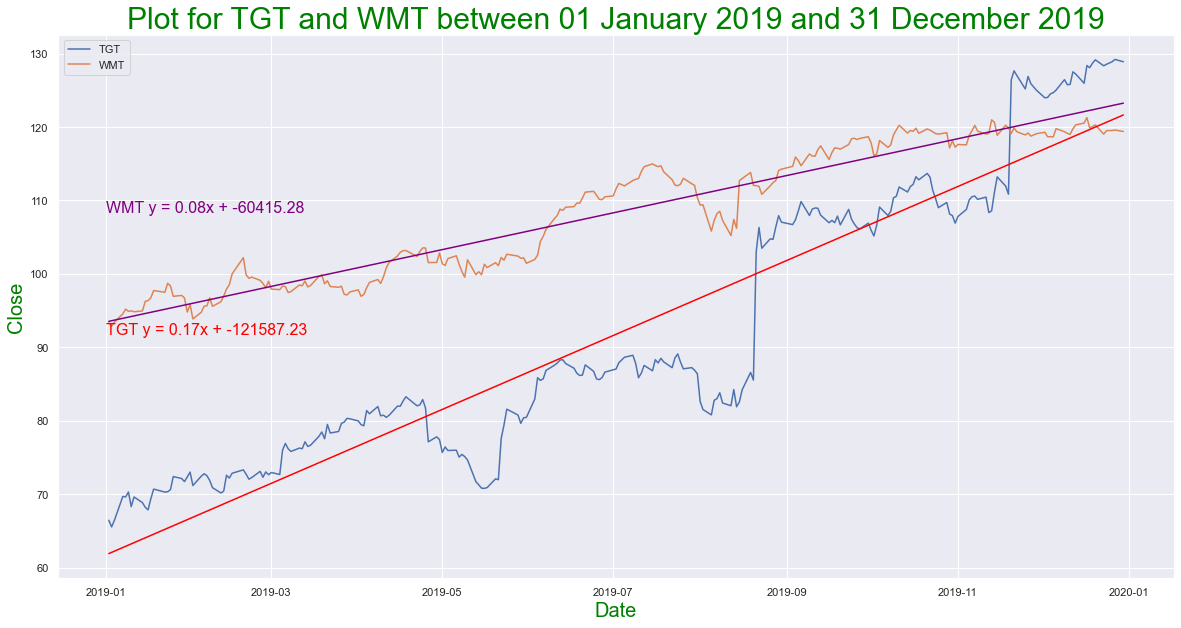

For TGT the r-value is: 0.9371335027954462 and p-value is: 7.689990292579723e-116
For WMT the r-value is: 0.9632797178999908 and p-value is: 3.36199558006526e-144


In [10]:
#Linear regression for TGT and WMT
linear_reg("Date", "Close", "TGT", "WMT")

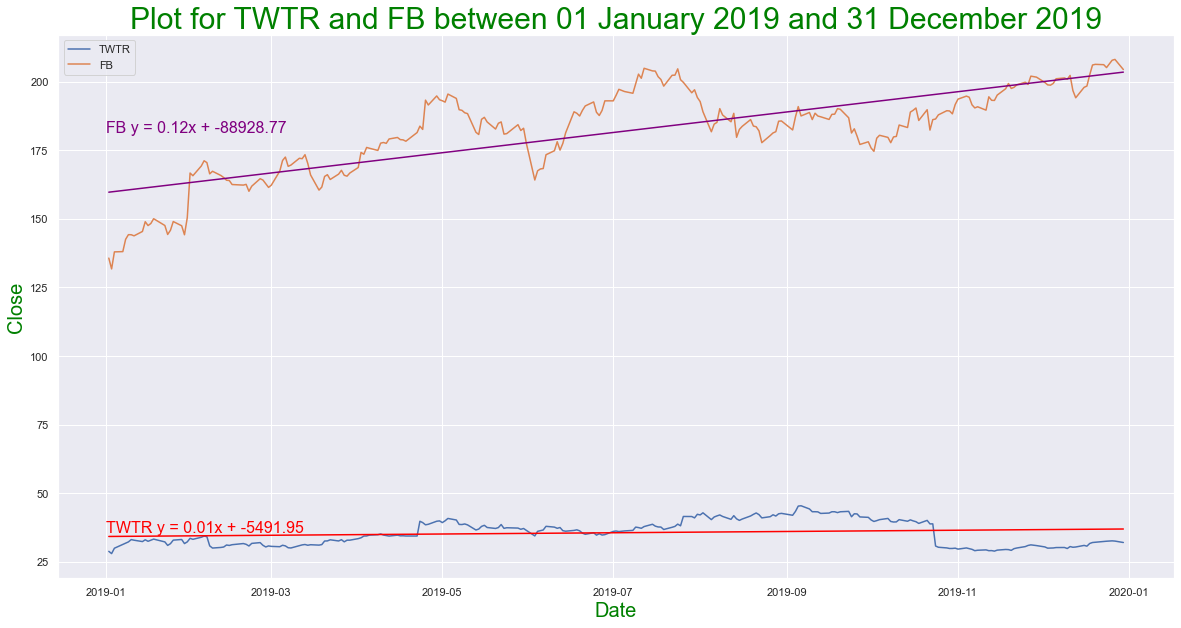

For TWTR the r-value is: 0.17368406948625228 and p-value is: 0.005798956524641901
For FB the r-value is: 0.7887152510053465 and p-value is: 1.5592093895777313e-54


In [11]:
#Linear regression for TWTR and FB
linear_reg("Date", "Close", "TWTR","FB")

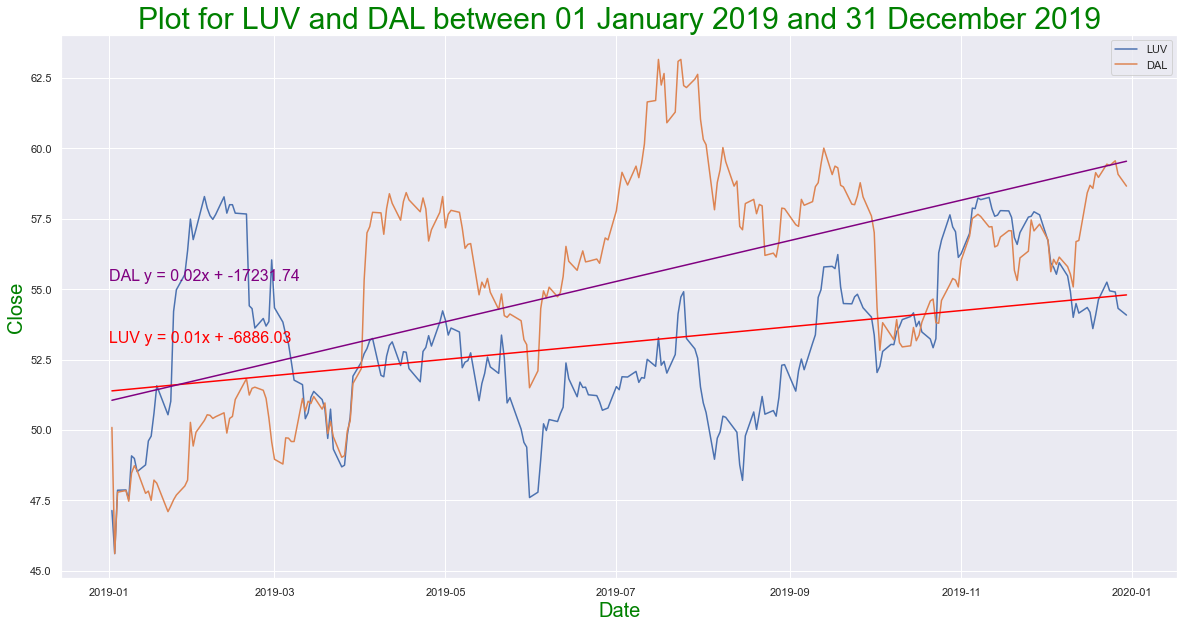

For LUV the r-value is: 0.36458735231673084 and p-value is: 2.6247352785121372e-09
For DAL the r-value is: 0.6307086091176517 and p-value is: 3.01519128632425e-29


In [12]:
#Linear regression for LUV and DAL
linear_reg("Date", "Close", "LUV","DAL")

In [13]:
stocksbydate = stockfinal.pivot_table(index=['Date'], columns="Name", values="Close")
stocksbydate

Name,DAL,FB,FDX,GM,LUV,TGT,TM,TWTR,UPS,WMT
Date,,,,,,,,,,
2019-01-02,50.090000,135.679993,163.190002,33.639999,47.139999,66.440002,116.279999,28.809999,97.209999,93.339996
2019-01-03,45.610001,131.740005,157.190002,32.250000,45.610001,65.529999,114.650002,27.990000,94.449997,92.860001
2019-01-04,47.790001,137.949997,164.429993,33.330002,47.860001,66.430000,119.730003,29.950001,97.739998,93.440002
2019-01-07,47.849998,138.050003,166.729996,34.360001,47.869999,69.680000,121.279999,31.340000,97.410004,94.540001
2019-01-08,47.470001,142.529999,167.020004,34.810001,47.540001,69.610001,122.309998,31.799999,97.419998,95.199997
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,59.439999,206.179993,151.690002,36.770000,55.250000,128.339996,141.960007,32.430000,118.940002,119.029999
2019-12-24,59.389999,205.119995,150.779999,36.580002,54.939999,128.550003,141.339996,32.500000,118.330002,119.510002
2019-12-26,59.560001,207.789993,152.490005,36.480000,54.900002,128.889999,141.529999,32.630001,119.040001,119.519997


In [14]:
#Calculate % change from 2019-01-02 (baseline 100%)
#returns = stocksbydate.apply(lambda x: np.log(x) - np.log(x.shift(1)))
returns = returns = stocksbydate.apply(lambda x: (x / x[0] * 100)-100)
returns

Name,DAL,FB,FDX,GM,LUV,TGT,TM,TWTR,UPS,WMT
Date,,,,,,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-8.943900,-2.903882,-3.676696,-4.131984,-3.245649,-1.369662,-1.401786,-2.846233,-2.839216,-0.514244
2019-01-04,-4.591733,1.673057,0.759844,-0.921515,1.527368,-0.015054,2.966980,3.956964,0.545210,0.107142
2019-01-07,-4.471954,1.746765,2.169246,2.140313,1.548578,4.876577,4.299966,8.781676,0.205745,1.285627
2019-01-08,-5.230583,5.048649,2.346959,3.478008,0.848540,4.771219,5.185758,10.378340,0.216026,1.992716
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,18.666397,51.960498,-7.047000,9.304403,17.204074,93.166754,22.084630,12.565085,22.353671,27.523038
2019-12-24,18.566579,51.179250,-7.604635,8.739603,16.546456,93.482839,21.551426,12.808055,21.726163,28.037290
2019-12-26,18.905972,53.147114,-6.556772,8.442331,16.461608,93.994574,21.714827,13.259291,22.456539,28.047998


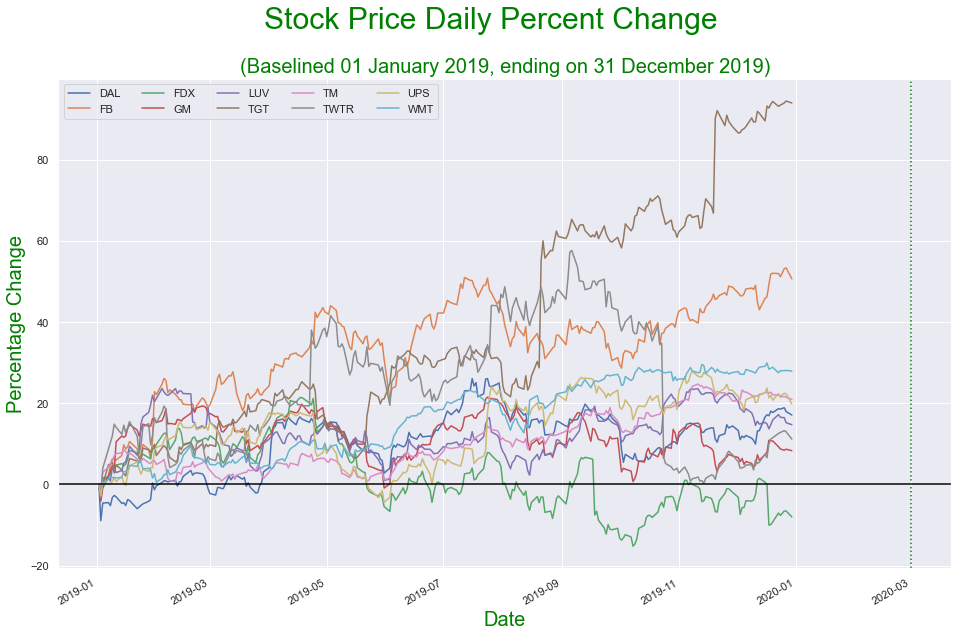

In [15]:
sns.set()
# This graph shows how different stocks did in relation to each other 
# using percentages, not absolute numbers.  
returns.plot(figsize=(16,10)).axhline(y=0, color="black")
plt.axvline(x='2020-03-1', color="green", linestyle='dotted')
plt.legend(ncol=5, loc="upper left")
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='upper right',
           #ncol=5, mode="expand", borderaxespad=0.)
plt.ylabel("Percentage Change", fontsize=20, color='green')
plt.xlabel("Date", fontsize=20, color='green')
plt.suptitle("Stock Price Daily Percent Change", fontsize=30, color='green')
plt.title(f'(Baselined {startString}, ending on {endString})', fontsize=20, color='green')
plt.savefig(f'{startString} - {endString}/All Stocks Percent Change {startString} - {endString}')
plt.show()